[*********************100%%**********************]  1 of 1 completed


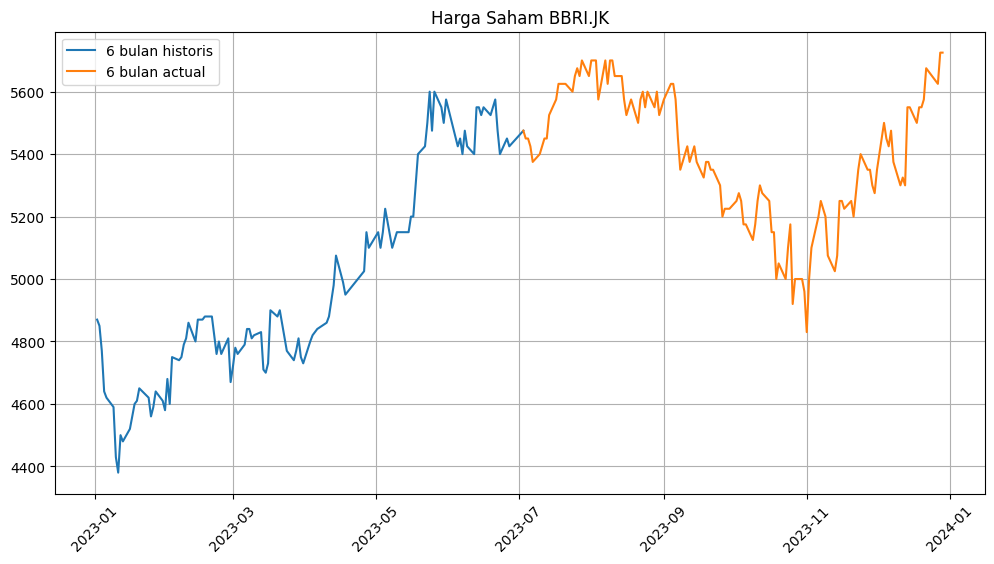

In [423]:
import yfinance as yf
import matplotlib.pyplot as plt

df = yf.download('BBRI.JK','2023-01-01', '2023-12-31')
hist = df.loc['2023-01-01':'2023-07-03']
actual = df.loc['2023-07-03':'2023-12-31']

plt.figure(figsize=(12,6))
plt.title("Harga Saham BBRI.JK")
plt.plot(hist["Close"],label="6 bulan historis")
plt.plot(actual["Close"],label="6 bulan actual")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

Kode ini bertujuan untuk melakukan analisis statistik pada data harga saham untuk mengukur kinerja historisnya. Analisis ini melibatkan perhitungan Compound Annual Growth Rate (CAGR), volatilitas tahunan, serta probabilitas pergerakan harga naik dan turun.

CAGR dihitung sebagai tingkat pertumbuhan tahunan rata-rata dari investasi selama periode waktu tertentu. Dalam kode ini, CAGR dihitung dengan rumus:

CAGR = (((harga awal/harga akhir)^(365/jumlah hari)) / 100) - 1

Volatilitas adalah ukuran variasi harga saham dari waktu ke waktu. Volatilitas tahunan dihitung menggunakan rumus deviasi standar dari persentase perubahan harga harian, kemudian dikalikan dengan akar kuadrat dari jumlah hari perdagangan dalam satu tahun (252 hari).

Probabilitas pergerakan harga naik dan turun dihitung dengan menghitung jumlah hari di mana harga saham mengalami kenaikan dan penurunan, kemudian membaginya dengan jumlah total hari perdagangan.

In [424]:
import math

# calculate the compound annual growth rate (CAGR) which 
# will give us our mean return input (mu) 
days = (actual.index[-1] - actual.index[0]).days
cagr = ((((actual['Close'][-1]) / actual['Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")

# create a series of percentage returns and calculate 
# the annual volatility of returns
actual['Returns'] = actual['Close'].pct_change()
vol = actual['Returns'].std()*math.sqrt(252)
print("Annual Volatility =",str(round(vol,4)*100)+"%")

# Calculate up and down probabilities based on historical returns
up_prob = (actual['Returns'] > 0).sum() / len(actual['Returns'])
down_prob = (actual['Returns'] < 0).sum() / len(actual['Returns'])

print("Up Probability =", str(round(up_prob, 4)*100) + "%")
print("Down Probability =", str(round(down_prob, 4)*100) + "%")

CAGR = 10.56%
Annual Volatility = 21.11%
Up Probability = 42.4%
Down Probability = 40.8%


/var/folders/jv/mmj5pl4x5vqfg9x9cw4cfn680000gn/T/ipykernel_17939/3786247375.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = ((((actual['Close'][-1]) / actual['Close'][1])) ** (365.0/days)) - 1
/var/folders/jv/mmj5pl4x5vqfg9x9cw4cfn680000gn/T/ipykernel_17939/3786247375.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Returns'] = actual['Close'].pct_change()


### Langkah-langkah Simulasi

1. Untuk setiap hari dalam simulasi, sebuah hasil acak (naik, turun, tetap) dihasilkan dengan mempertimbangkan probabilitas masing-masing.
2. Perubahan harga dihitung berdasarkan hasil acak, volatilitas, tingkat pengembalian rata-rata, dan dampak faktor eksternal.
3. Jika hasil acak menunjukkan perubahan harga naik, dampak faktor eksternal ditambahkan; jika turun, dampak dikurangkan.
4. Harga saham saat ini diperbarui dan ditambahkan ke daftar harga harian.

In [425]:
import random
import matplotlib.pyplot as plt

def simulate_stock_price(start_price, days, volatility, up_prob, down_prob, factor_impact, mean_return):
    prices = []
    current_price = start_price

    for _ in range(days):
        # Generate random outcome (up, down, still)
        outcome = random.choices([-1, 0, 1], weights=[down_prob, 1 - up_prob - down_prob, up_prob])[0]

        # Calculate price change based on outcome, volatility, mean return, and factor impact
        price_change = random.normalvariate(mean_return, volatility) * outcome

        # Apply external factor impact if applicable
        if outcome == 1:
            price_change += factor_impact
        elif outcome == -1:
            price_change -= factor_impact

        # Update current price and add to list
        current_price += price_change
        prices.append(current_price)

    return prices

### Simulasi Saham

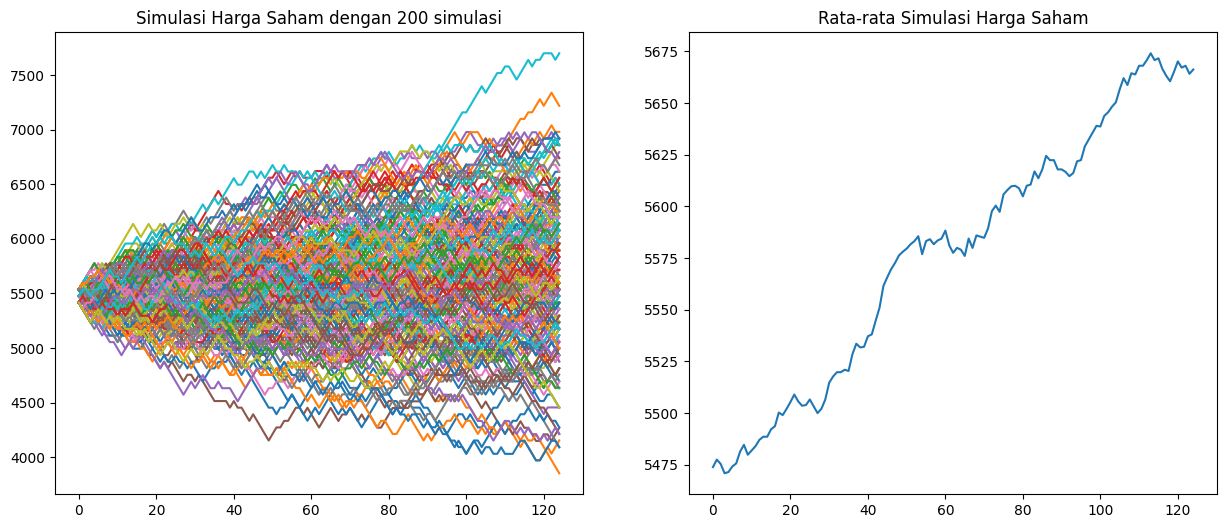

In [426]:
import seaborn as sns
import numpy as np

# Example usage with mean return
start_price = hist['Close'].iloc[-1]
days = len(actual['Close'])
volatility = vol
up_prob = up_prob
down_prob = down_prob
factor_impact = 60
mean_return = cagr

# Number of simulations
simulations = 200
sim_price = []

for _ in range(simulations):
    sim_price.append(simulate_stock_price(start_price, days, volatility, up_prob, down_prob, factor_impact, mean_return))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the paths
[sns.lineplot(data=k, ax=ax1) for k in sim_price]

# Average path of stock prices
smean = np.mean(np.array(sim_price), axis=0)

sns.lineplot(data=smean, ax=ax2)

ax1.title.set_text(f'Simulasi Harga Saham dengan {simulations} simulasi')
ax2.title.set_text('Rata-rata Simulasi Harga Saham')

plt.show()

### Evaluasi hasil simulasi

Kode ini bertujuan untuk mengevaluasi kualitas hasil simulasi harga saham dengan membandingkannya dengan harga saham aktual. Evaluasi dilakukan menggunakan metrik Mean Squared Error (MSE) dan Mean Absolute Percentage Error (MAPE). Tujuan utama adalah untuk mengidentifikasi simulasi yang paling mendekati harga saham aktual.

Simulasi terbaik memiliki MSE paling rendah, disimpan dalam variabel closest_simulation.

In [427]:
actual_prices = actual['Close'].values
simulated_prices = np.array(sim_price)

# Calculate Mean Squared Error (MSE) for each simulation
mse_values = np.mean((simulated_prices - actual_prices.reshape(1, -1))**2, axis=1)

# Find the index of the simulation with the minimum MSE
closest_simulation_index = np.argmin(mse_values)

# Get the closest simulated price path
closest_simulation = simulated_prices[closest_simulation_index]

print(f"Best Mean Squared Error (MSE): {mse_values[closest_simulation_index]}")
print(f"Mean Absolute Percentage Error (MAPE): {np.mean(np.abs((actual_prices - closest_simulation) / actual_prices)) * 100}")

Best Mean Squared Error (MSE): 19128.776119177655
Mean Absolute Percentage Error (MAPE): 1.9975437944256471


### Visualisasi perbandingan simulasi dengan harga aktual

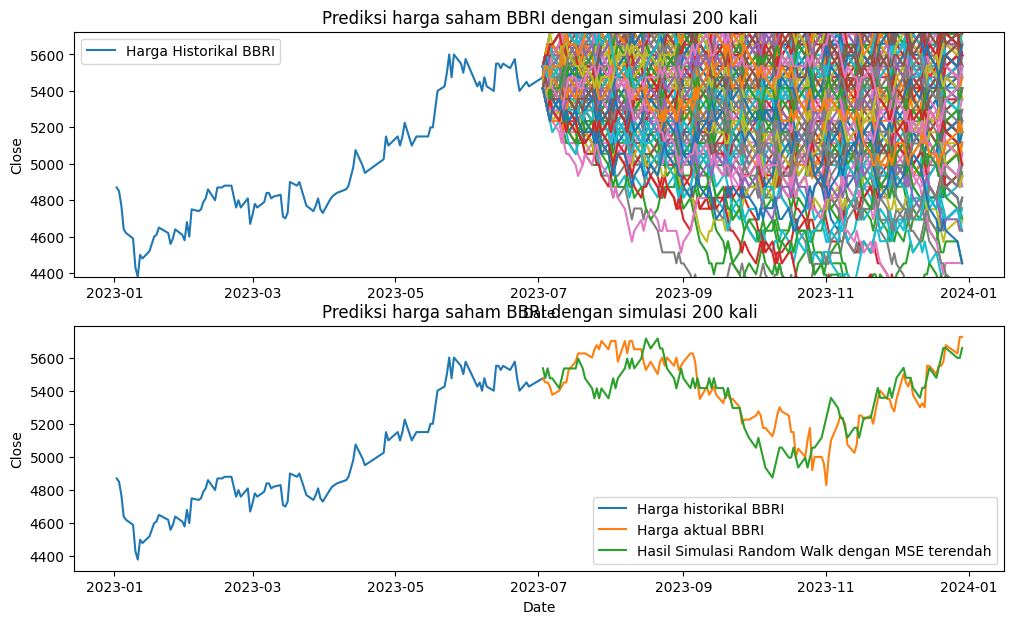

In [428]:
import pandas as pd

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7))

sns.lineplot(data=hist['Close'], ax=ax1, label='Harga Historikal BBRI')
sns.lineplot(data=actual['Close'], ax=ax1)
[sns.lineplot(data=pd.Series(k, index=actual.index), ax=ax1) for k in sim_price]

sns.lineplot(data=hist['Close'], label='Harga historikal BBRI', ax=ax2)
sns.lineplot(data=actual['Close'], label='Harga aktual BBRI', ax=ax2)
sns.lineplot(data=pd.Series(closest_simulation, index=actual.index), label='Hasil Simulasi Random Walk dengan MSE terendah', ax=ax2)

ax1.set_title(f'Prediksi harga saham BBRI dengan simulasi {simulations} kali')
ax2.set_title(f'Prediksi harga saham BBRI dengan simulasi {simulations} kali')

ax1.set_ylim(top=max(actual['Close'].max(), hist['Close'].max()), bottom=min(actual['Close'].min(), hist['Close'].min()))

plt.show()